In [2]:
#importing required modules
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('/content/drive/MyDrive/bitcoin.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704


<Axes: xlabel='Close', ylabel='Open'>

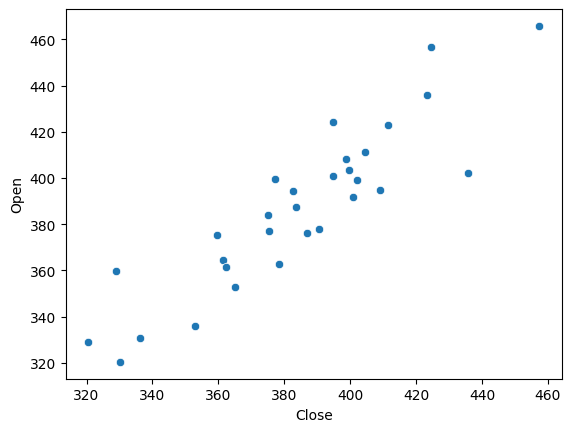

In [10]:
#Data Visulization
import seaborn as sns
df1=df.head(30) #Visulizing first 30 rows
sns.scatterplot(x='Close',y='Open',data=df1)

Text(0.5, 1.0, 'Bitcoin Trading Volume Over Time')

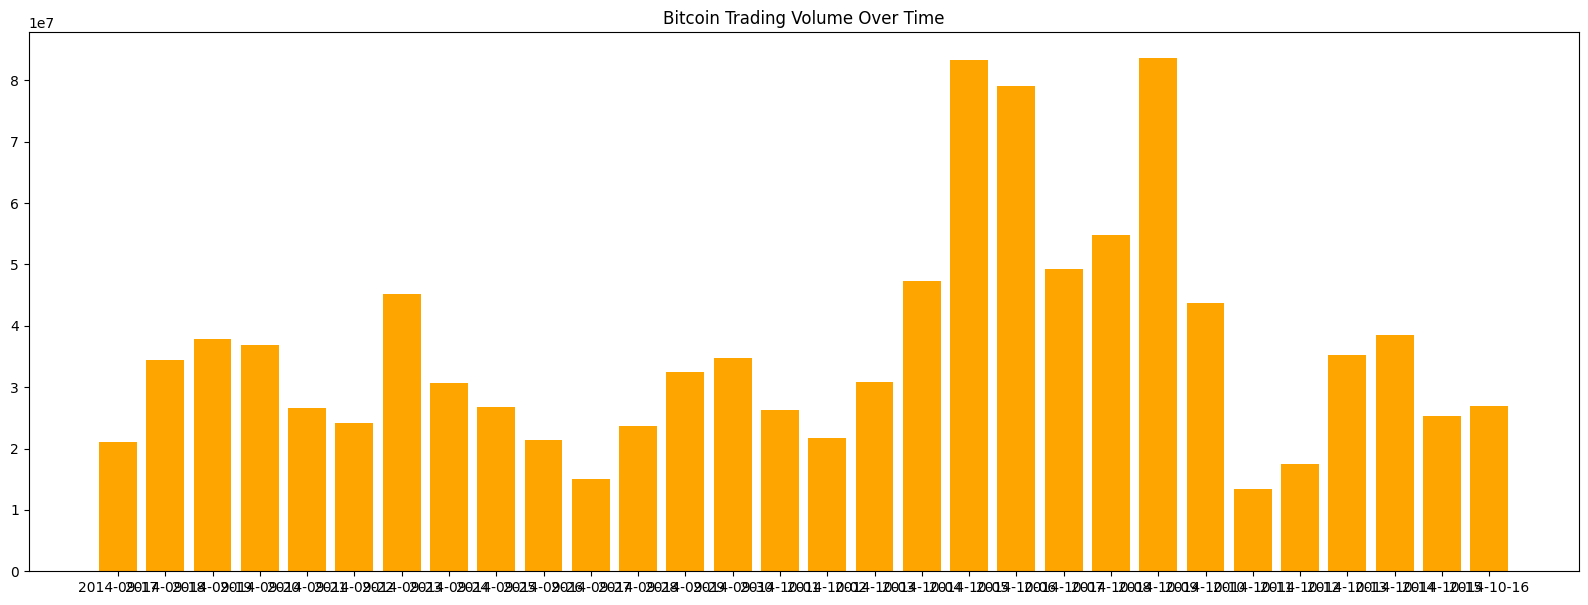

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.bar(df1['Date'], df1['Volume'], color='orange')
plt.title("Bitcoin Trading Volume Over Time")

In [18]:
# 2nd -step Data Cleaning
#checking missing values
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,1
Adj Close,0
Volume,0


In [20]:
# Removeing the missing value
df.dropna(inplace=True)
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [21]:
# 3rd step Data Transformation here convert Date to numerical.# preeprocessing
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['Date']=l.fit_transform(df['Date'])


In [23]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


In [25]:
#4th data spliting now split the data into train , test.
x=df.drop('Volume',axis=1)#because volume is the target variable
y=df['Volume']


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape

(2169, 6)

In [29]:
y_train.shape

(2169,)

In [30]:
# model training
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [32]:
l.fit(x_train,y_train)

LinearRegression()

In [35]:
# predict the outcome
y_pred=l.predict(x_test)

In [36]:
y_pred #predicted values

array([ 2.20109860e+10,  6.59447300e+09,  3.76861130e+10, -6.41801861e+09,
        1.80715265e+10,  1.58263173e+10,  2.52547848e+10,  2.12645981e+10,
       -2.68855576e+09,  2.16221355e+10,  1.31511947e+10, -7.32721589e+07,
        6.22787756e+09, -5.50908327e+09, -5.49678362e+09, -5.66829310e+09,
        4.91614249e+09,  1.21992107e+10,  1.31596235e+10, -2.58598140e+09,
        1.13207491e+10,  4.70307431e+10, -3.04392873e+09,  5.60220401e+10,
        1.58452234e+10,  5.70266529e+10,  1.36731695e+10, -5.60410861e+09,
        5.45329019e+10,  4.36466330e+08,  4.33837636e+10,  3.89311561e+10,
        3.13699644e+08,  2.03480736e+10,  6.23370665e+09, -6.87663971e+09,
       -6.80960219e+09,  4.19714884e+09, -4.34046035e+09, -2.99984062e+09,
        1.52056212e+10,  5.30053223e+10,  1.17486049e+10,  1.22502675e+10,
        3.64304763e+08,  4.19705995e+09,  2.63732198e+10,  2.79323905e+10,
        1.90337994e+10,  5.54701557e+09,  8.68917810e+10,  2.28812610e+10,
        4.69431102e+10,  

In [37]:
# final step model evalution
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error
print("The accuracy of model is",r2_score(y_test,y_pred))

The accuracy of model is 0.7545655567129659


In [39]:
mean_absolute_error(y_test,y_pred)

6778000505.779667

In [40]:
root_mean_squared_error(y_test,y_pred)

9363758637.460165